
# About the Data
- ###  Title: Spotify Dataset 1921-2020, 600k+ Tracks
- ###  Subtitle: Audio features of 600k+ tracks, popularity metrics of 1M+ artists
- ##### Source: Kaggle
- ###### Creator: Yamac Eren Ay

In [99]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

### Importing and Cleaning Artist Data

In [100]:
# import the artist data 
df_artist = pd.read_csv('.\spotify-dataset-19212020-600k-tracks/artists.csv')
df_artist.tail()

,id,followers,genres,name,popularity
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,['black comedy'],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,['black comedy'],Donnell Rawlings,15
1162094,2bP2cNhNBdKXHC6AnqgyVp,40.0,['new comedy'],Gabe Kea,8


In [101]:
#check for any missing data across the columns
df_artist.isna().sum()

id             0
followers     11
genres         0
name           0
popularity     0
dtype: int64

In [102]:
# filter for non missing data only
df_artist = df_artist[~df_artist["followers"].isna()]

In [103]:
# rows x columns
df_artist.shape

(1162084, 5)

In [104]:
# distinct genres
df_artist.genres.unique()

array(['[]', "['carnaval cadiz']", "['classical harp', 'harp']", ...,
       "['dark post-punk', 'french post-punk', 'polish post-punk']",
       "['pop punk', 'tulsa indie']",
       "['clean comedy', 'deep comedy', 'new comedy']"], dtype=object)

##### Clean the genres columns by removing the whitespace, brackets and qotes

In [105]:
df_artist["genres"] = df_artist['genres'].map(lambda x: x.lstrip("['"))

In [106]:
df_artist["genres"] = df_artist['genres'].map(lambda x: x.rstrip("']"))

In [107]:
df_artist['genres'] = df_artist['genres'].apply(lambda x: x.replace("'", ' '))

In [108]:
df_artist.shape

(1162084, 5)

In [109]:
# confirm the new diistinct values of the genres column
df_artist["genres"].unique()

array(['', 'carnaval cadiz', 'classical harp ,  harp', ...,
       'dark post-punk ,  french post-punk ,  polish post-punk',
       'pop punk ,  tulsa indie',
       'clean comedy ,  deep comedy ,  new comedy'], dtype=object)

##### Notice that there are rows with empty values in the genres column

In [110]:
# drop rows with missing values
df_artist.dropna(subset= ["genres"], inplace = True)

In [111]:
df_artist.replace("", np.nan, inplace=True)

In [112]:
df_artist = df_artist.dropna()

In [113]:
df_artist.genres.str.title().unique()

array(['Carnaval Cadiz', 'Classical Harp ,  Harp', 'Classical Contralto',
       ..., 'Dark Post-Punk ,  French Post-Punk ,  Polish Post-Punk',
       'Pop Punk ,  Tulsa Indie',
       'Clean Comedy ,  Deep Comedy ,  New Comedy'], dtype=object)

In [114]:
df_artist.genres.astype('category')

45                                    carnaval cadiz
46                                    carnaval cadiz
47                                    carnaval cadiz
48                                    carnaval cadiz
136                           classical harp ,  harp
                             ...                    
1162087    clean comedy ,  deep comedy ,  new comedy
1162088                                  deep comedy
1162090                                 black comedy
1162093                                 black comedy
1162094                                   new comedy
Name: genres, Length: 305590, dtype: category
Categories (49154, object): ['"australian children s music"', '"australian children s music",  australian co..., '"australian children s music",  australian pop', '"australian children s music",  australian si..., ..., 'zouk ,  zouk riddim', 'zouk riddim', 'zurich indie', 'zydeco']

In [115]:
df_artist.genres.value_counts(dropna=False)

background piano                                                                                                 307
calming instrumental                                                                                             256
background music                                                                                                 247
russelater                                                                                                       226
barnmusik                                                                                                        225
                                                                                                                ... 
christian hip hop ,  christian pop ,  christian trap ,  miami hip hop ,  rap cristiano                             1
edm ,  moldovan pop ,  pop dance ,  progressive house ,  progressive trance ,  trance ,  uplifting trance          1
comic ,  modern ska punk ,  punk ,  ska ,  ska punk             

In [116]:
# confir, the new shape of the data
df_artist.shape

(305590, 5)

### Importing and Cleaning of Tracks data

In [117]:
# import the Tracks data
df_tracks = pd.read_csv('.\spotify-dataset-19212020-600k-tracks/tracks.csv')

In [118]:

# check for missing values in the columns
df_tracks.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [119]:
# drop missing values
df_tracks = df_tracks.dropna()

In [120]:
# rows x columns
df_tracks.shape

(586601, 20)

In [121]:

# check for the information about each columns
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

In [122]:
# Descriptive statistics
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586601.0,27.573212,18.369417,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586601.0,230054.852626,126532.824981,3344.0,175083.0000,214907.000000,263867.00000,5621218.000
explicit,586601.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
danceability,586601.0,0.563612,0.166101,0.0,0.4530,0.577000,0.68600,0.991
energy,586601.0,0.542071,0.251910,0.0,0.3430,0.549000,0.74800,1.000
key,586601.0,5.221594,3.519420,0.0,2.0000,5.000000,8.00000,11.000
loudness,586601.0,-10.205789,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
mode,586601.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586601.0,0.104870,0.179902,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586601.0,0.449803,0.348812,0.0,0.0969,0.422000,0.78400,0.996


# Exploratory Analysis & Visualization


In [123]:

# List the 10 least popular tracks
# sort the values of the tracks by its popularity
sorted_df = df_tracks.sort_values('popularity', ascending=True)
sorted_df.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
134528,2hV7SShXsBeomXtpd53QNh,You and the night and the music,0,168098,0,"['Libby Holman & Her Orchestra', 'Libby Holman']","['1BJcpnHvZBZSgUBEch0utn', '08czVWdmLSEES9nLc4...",1934,0.306,0.171,4,-16.752,0,0.0374,0.981,0.000002,0.3720,0.352,127.261,5
132451,2heB3jEdRgx83180axN3cd,Roses of Picardy,0,162843,0,['Paul Specht'],['1tCrPspkGQyLDhWFmTZanI'],1923,0.324,0.495,5,-14.571,1,0.0336,0.978,0.760000,0.4060,0.702,207.380,4
132450,2ew5dyayICmi1B9DHhQhEh,I'm the last of the red hot mamas,0,118465,0,['Sophie Tucker'],['58nEgrqod6YO5ZATASjIQ8'],1923,0.607,0.319,0,-15.191,1,0.3580,0.996,0.577000,0.6640,0.795,84.080,4
132449,2baUvPSWFyxIkSUECmghxC,Snakes hips,0,190063,0,['The Georgians'],['58LQXzq5kNsvPQdviB4ZyL'],1923,0.640,0.541,3,-7.905,1,0.0384,0.996,0.879000,0.0853,0.844,98.589,4
132448,2ZTaPJ3LuOz4DC6nnoeTEv,The man I love,0,172905,0,"['Sophie Tucker', 'Miff Mole']","['58nEgrqod6YO5ZATASjIQ8', '1WZqArTg7JOsXScvGF...",1923,0.487,0.163,8,-15.863,1,0.0449,0.992,0.000041,0.0702,0.502,109.412,5
132447,2Rfr8KkJOYpir4uaTKrowo,I'll Have Vanilla,0,191970,0,['Eddie Cantor'],['2pDFdLHKOmzKiNDzkz7p8L'],1923,0.636,0.326,0,-11.082,0,0.0462,0.983,0.000010,0.3880,0.673,110.490,4
132446,2PQzuSpu8fyEIm1RWafECX,Little Curly Hair In a High Chair,0,193459,0,"['Jerry Joyce', 'Eddie Cantor']","['1t8J6SE9IOemeQWADZZSax', '2pDFdLHKOmzKiNDzkz...",1923,0.325,0.152,6,-15.167,1,0.0390,0.988,0.009300,0.4240,0.320,87.750,4
132445,2Oea70hSqLAgTYVZkHIvBW,The Grass Grows Greener,0,195078,0,['Paul Specht'],['1tCrPspkGQyLDhWFmTZanI'],1923,0.564,0.423,10,-9.269,1,0.2990,0.994,0.062700,0.2300,0.683,206.289,4
132444,2NdFpF9VzMiXIB5FFhFgTb,Savannah,0,204979,0,['The Georgians'],['58LQXzq5kNsvPQdviB4ZyL'],1923,0.580,0.577,5,-7.879,1,0.0390,0.995,0.877000,0.1100,0.664,98.528,4
132443,2I6KmLYGf0C0Xz7UGWlE6D,Barney google,0,177393,0,['The Georgians'],['58LQXzq5kNsvPQdviB4ZyL'],1923,0.685,0.481,7,-7.628,1,0.0387,0.996,0.888000,0.3420,0.859,106.601,4


#### -  It appears that most of the tracks released before 1950 are less popular, this might be due to low usage of technology such as social media for tracks rating.

In [124]:
# Get Top 10 most popular tracks
most_popular = df_tracks.query('popularity > 90', inplace=False).sort_values('popularity', ascending=False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


#### - The most popular track is Peaches (feat. Daniel Caesar & Giveon) produced by Justin Bieber released on March 19, 2021

In [125]:
# filter for tracks released between 2000 and 2021
df_tracks = df_tracks.loc[(df_tracks["release_date"]>= '2000-01-01') & (df_tracks["release_date"]< '2021-12-31')]

In [126]:

# Set date as index and convert to datetime
df_tracks.set_index("release_date", inplace= True)

In [127]:

# Convert date column to proper date format
df_tracks.index = pd.to_datetime(df_tracks.index)
df_tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
2008-02-11,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3
2020-03-13,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4
2008-02-11,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4


In [128]:
# create new columns day, month, year from the release_date column 
df_tracks['day'] = df_tracks.index.day
df_tracks['month'] = df_tracks.index.month
df_tracks['year'] = df_tracks.index.year

In [129]:
# Convert the duration column from ms to minutes
df_tracks["duration"] = df_tracks["duration_ms"].apply(lambda x: round(x/60000))
df_tracks.drop('duration_ms', inplace=True, axis=1)

In [130]:
# confirm duration column
df_tracks.duration.head()

release_date
2008-02-11    3
2020-03-13    3
2008-02-11    2
2008-02-11    3
2018-05-04    3
Name: duration, dtype: int64

In [131]:
# sort the data by the release_date column
df_tracks = df_tracks.sort_values("release_date", ascending=False)

In [132]:

corr_columns = df_tracks[['popularity', 'danceability', 'energy', 'loudness', 'speechiness','acousticness', 'instrumentalness','liveness', 'valence','tempo']]
corr_columns.head(10)

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
release_date,,,,,,,,,,
2021-04-16,0,0.777,0.642,-6.657,0.0566,0.1760,0.000015,0.1780,0.589,115.930
2021-04-16,0,0.677,0.506,-6.652,0.0964,0.3450,0.000000,0.1180,0.497,145.843
2021-04-16,0,0.717,0.821,-5.830,0.0608,0.0631,0.000000,0.0650,0.569,96.033
2021-04-16,0,0.749,0.815,-6.381,0.0830,0.2280,0.001170,0.0838,0.866,102.218
2021-04-16,0,0.658,0.634,-5.797,0.0413,0.0106,0.000000,0.1320,0.290,139.980
2021-04-16,0,0.760,0.716,-6.360,0.0817,0.0223,0.000000,0.2310,0.469,105.007
2021-04-16,0,0.774,0.873,-1.587,0.0418,0.0153,0.005060,0.2930,0.845,96.033
2021-04-16,0,0.782,0.510,-5.724,0.0419,0.1430,0.000000,0.1150,0.118,99.993
2021-04-16,0,0.782,0.510,-5.724,0.0419,0.1430,0.000000,0.1150,0.118,99.993


# VISUALIZATION & CORRELATION 

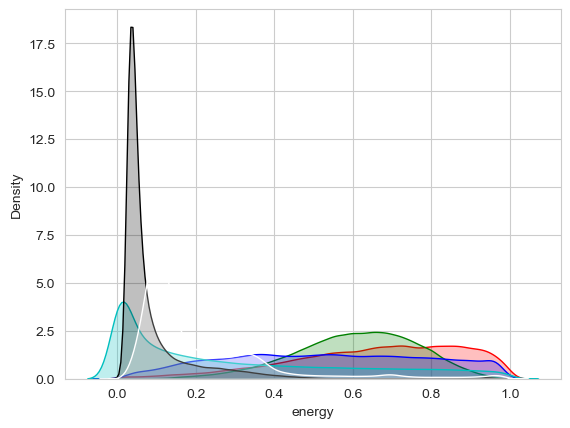

In [133]:

p1=sns.kdeplot(df_tracks['energy'], shade=True, color="r" )
p2=sns.kdeplot(df_tracks['danceability'], shade=True, color="g")
p3=sns.kdeplot(df_tracks['valence'], shade=True, color="b" )
p4=sns.kdeplot(df_tracks['acousticness'], shade=True, color="c" )
p5=sns.kdeplot(df_tracks['speechiness'], shade=True, color="k" )
p6=sns.kdeplot(df_tracks['liveness'], shade=True, color="w")

In [134]:
# sample random data
sample_df = df_tracks.sample(int(0.004*len(df_tracks)))

In [135]:
# length of the sample data
len(sample_df)

843

[Text(0.5, 1.0, 'Loudness Vs Energy ')]

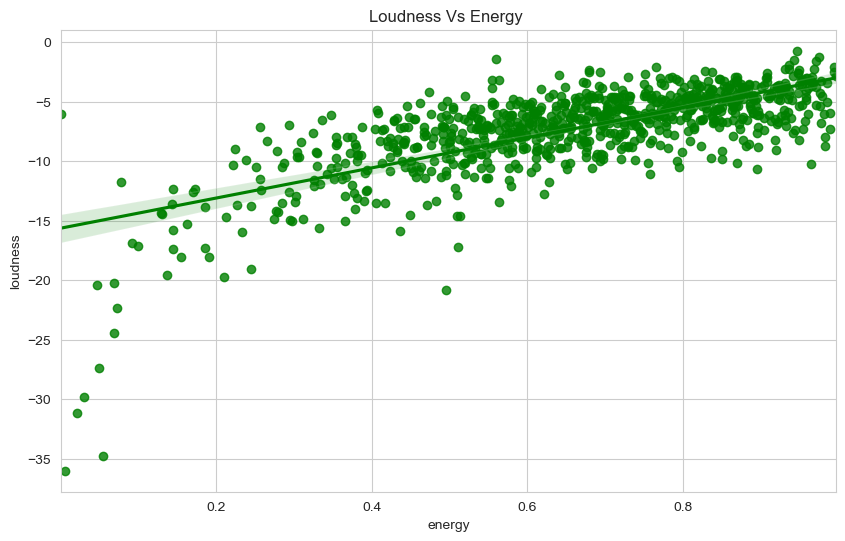

In [136]:
# Plot a regression plot to compare the relationship between Loudness and Energy of a song
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y='loudness', x="energy", color='g').set(title='Loudness Vs Energy ')

### There is a positive correlation between Loudness and Energy which implies the energy of a song depends how lound the song 

[Text(0.5, 1.0, 'Popularity Vs Acousticness')]

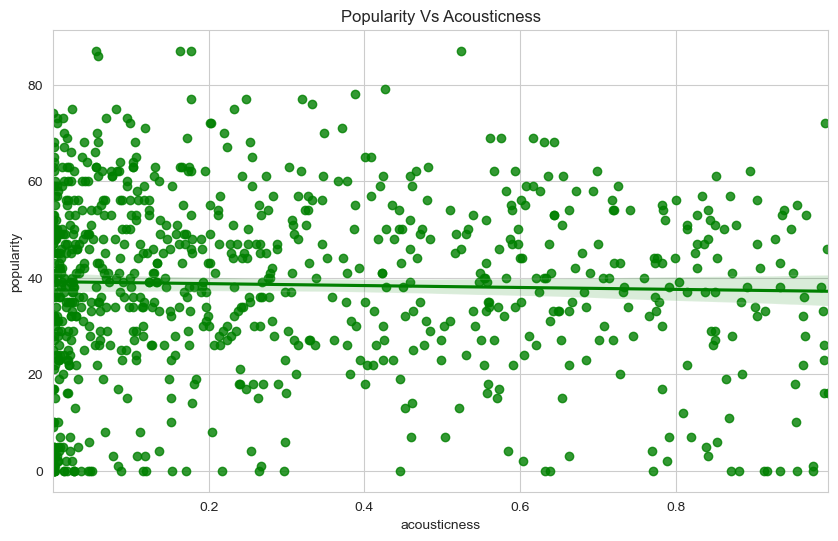

In [137]:

# Compare the popularity and acousticness of songs
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y='popularity', x="acousticness", color='g').set(title='Popularity Vs Acousticness')

[Text(0.5, 1.0, 'Energy Vs Acousticness')]

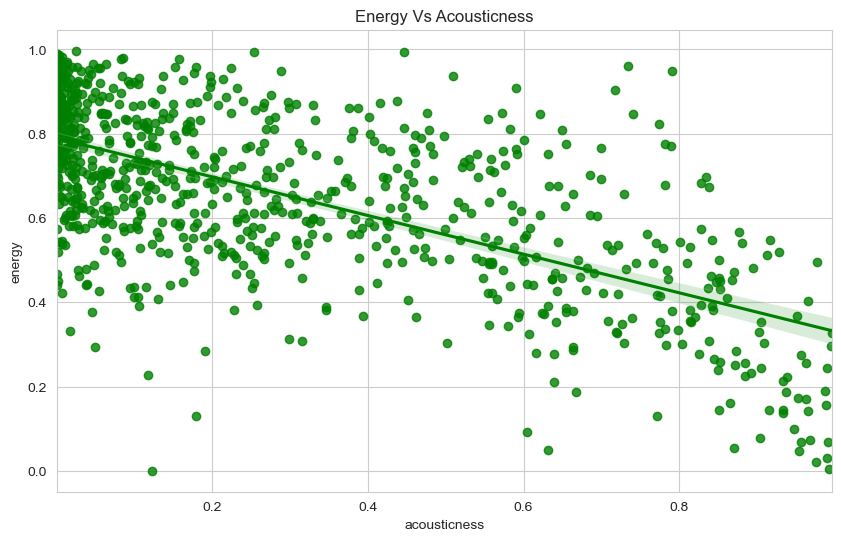

In [138]:

# Correlation between Energy and Acousticness of a track
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y='energy', x="acousticness", color='g').set(title='Energy Vs Acousticness')

### A Negative correlation - Songs with more acousticness have less energy

In [139]:
# filter and convert the years column to a date data type
df_tracks['date'] = df_tracks.index.get_level_values('release_date')
df_tracks.date = pd.to_datetime(df_tracks.date)
df_tracks['years'] = df_tracks.date.dt.year

In [140]:
# import seaborn package for visualization
!pip install --user seaborn==0.11.0;

In [141]:
# filter for data including years in the 2000s
filtered_date = df_tracks.loc[df_tracks['years'] >= 2000]
filtered_date.tail()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,...,liveness,valence,tempo,time_signature,day,month,year,duration,date,years
release_date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,2nRLVu5LYBxrQl9F7J0TP5,California Dreamin' - Remastered,28,0,['The Beach Boys'],['3oDbviiivRWhXwIE8hxkVV'],0.615,0.810,1,-7.247,...,0.0855,0.764,118.278,4,1,1,2000,3,2000-01-01,2000
2000-01-01,77RfAs8WTheG90hvSyNBMP,Танцы,26,0,['Tantsy Minus'],['6xFnKVrOJtiGfcPdsA7qUz'],0.571,0.736,9,-7.360,...,0.1830,0.382,126.943,4,1,1,2000,5,2000-01-01,2000
2000-01-01,08luiPnm3XB4YUbmQxvWw1,Ein Zwei Drei Waltz,25,0,['Agatha Christie'],['6UvQrW56NzLbUtAKIdTg8N'],0.558,0.862,5,-2.288,...,0.3390,0.477,129.989,4,1,1,2000,4,2000-01-01,2000
2000-01-01,3Vtpv6GmCx1XgiAw3o4jb6,The Trader - Remastered 2000,3,0,['The Beach Boys'],['3oDbviiivRWhXwIE8hxkVV'],0.588,0.350,2,-11.753,...,0.0979,0.175,114.406,4,1,1,2000,5,2000-01-01,2000
2000-01-01,2sjhnnxPsii5QCrAtGKLrR,Enamorada,34,0,['Julissa'],['6WCFOdK10oxg9dYaaIyeZu'],0.633,0.842,5,-5.642,...,0.3930,0.381,129.975,4,1,1,2000,4,2000-01-01,2000


In [142]:
filtered_date['years'].astype('category')

release_date
2021-04-16    2021
2021-04-16    2021
2021-04-16    2021
2021-04-16    2021
2021-04-16    2021
              ... 
2000-01-01    2000
2000-01-01    2000
2000-01-01    2000
2000-01-01    2000
2000-01-01    2000
Name: years, Length: 210839, dtype: category
Categories (22, int64): [2000, 2001, 2002, 2003, ..., 2018, 2019, 2020, 2021]

In [143]:
# number of songs released per year
song_count = df_tracks['years'].value_counts()
song_count

2020    13937
2019    11907
2014    11252
2016    11083
2018    10936
2015    10591
2013    10557
2017     9889
2012     9744
2008     9714
2011     9689
2010     9597
2009     9593
2004     9251
2002     8879
2005     8857
2007     8770
2006     8751
2003     8210
2001     7259
2021     6281
2000     6092
Name: years, dtype: int64

In [144]:
filtered_date['popularity'].unique()

array([  0,  40,  38,  39,   3,   1,  29,   2,  26,  27,  21,  28,  23,
         5,   6,   7,  36,   8,  49,  35,  65,  69,   4,  10,   9,  14,
        20,  59,  12,  19,  55,  57,  67,  58,  54,  30,  13,  53,  16,
        52,  31,  33,  34,  50,  17,  63,  56,  32,  24,  61,  73,  64,
        37,  11,  47,  15,  51,  18,  22,  48,  45,  78,  75,  74,  85,
        25,  79,  89,  80,  77,  76,  43,  66,  42,  41,  68,  62,  72,
        60,  70,  46,  44,  82,  71,  84,  81,  90,  88,  83, 100,  87,
        86,  96,  92,  91,  94,  99,  98,  93,  97,  95], dtype=int64)

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

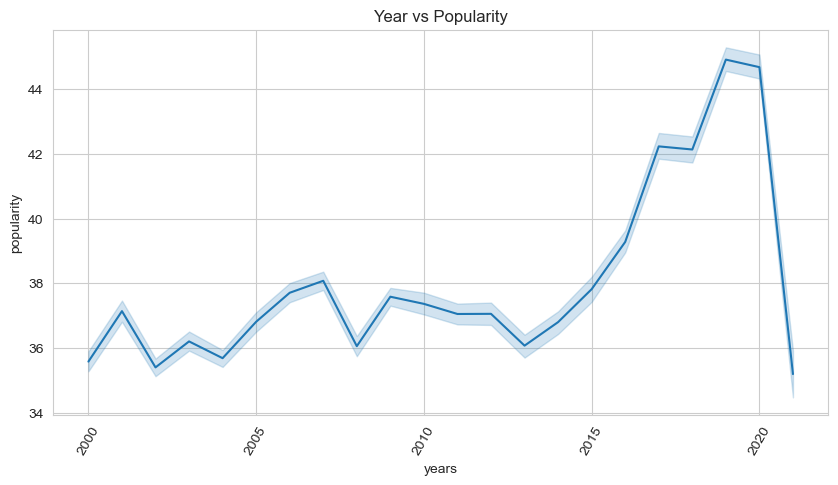

In [145]:

sns.set_style(style='whitegrid')
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data = filtered_date, x='years', y='popularity' , ax=ax).set(title='Year vs Popularity')
plt.xticks(rotation=60)


#### Popularity of music has increased over the years

In [146]:
filtered_date = df_tracks.loc[df_tracks['years'] >= 2000].drop_duplicates()

[Text(0.5, 1.0, 'Danceability of Songs')]

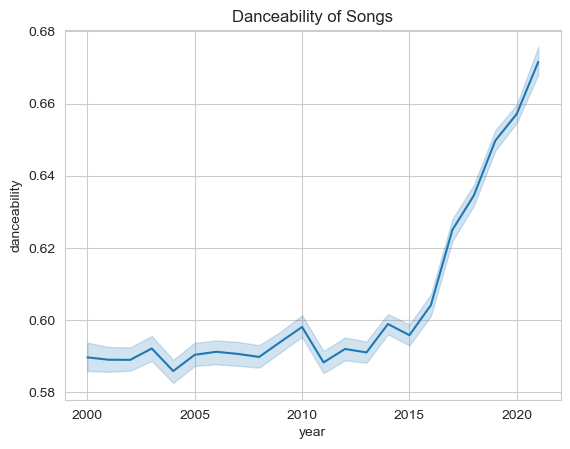

In [147]:

# Distribution of songs released per year

song_count = df_tracks['years'].value_counts()

sns.lineplot( data = filtered_date, x = 'year', y = 'danceability').set(title='Danceability of Songs')


(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

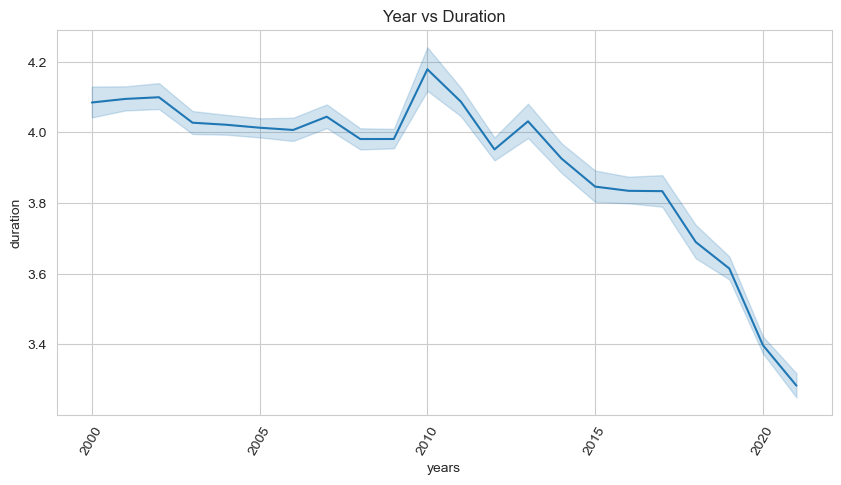

In [148]:
# Plot a lineplot to show the Average duration of songs over the years
total_dr = df_tracks.duration
sns.set_style(style='whitegrid')
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.lineplot(data = filtered_date, x='years', y='duration' , ax=ax).set(title='Year vs Duration')
plt.xticks(rotation=60)

In [149]:

# Top 5 most popular artists
most_popular_artist = df_artist.query('popularity > 90', inplace=False).sort_values('popularity', ascending=False)
most_popular_artist['name'][:5]

144481    Justin Bieber
313676            Drake
115489        Bad Bunny
126338     Taylor Swift
144483       The Weeknd
Name: name, dtype: object

In [150]:

# Top 5 most followed artists
most_followed_artist = df_artist.query('followers > 40000000', inplace=False).sort_values('followers', ascending=False)
most_followed_artist[:5]

,id,followers,genres,name,popularity
144138,6eUKZXaKkcviH0Ku9w2n3V,78900234.0,"pop , uk pop",Ed Sheeran,92
144485,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"pop , post-teen pop",Ariana Grande,95
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"canadian hip hop , canadian pop , hip hop , ...",Drake,98
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"canadian pop , pop , post-teen pop",Justin Bieber,100
144488,7dGJo4pcD2V6oG8kP0tJRR,43747833.0,"detroit hip hop , hip hop , rap",Eminem,94


In [151]:
artist_tracks = df_tracks.merge(df_artist, left_on='id_artists', right_on='id', how='left', suffixes=('_tracks', '_artists'))
artist_tracks.head()

,id_tracks,name_tracks,popularity_tracks,explicit,artists,id_artists,danceability,energy,key,loudness,...,month,year,duration,date,years,id_artists,followers,genres,name_artists,popularity_artists
0,1NCLXNEEpUtSV8eS7me71G,Tu Verdad,0,0,['J Balvin'],['1vyhD5VmyZ7KMfW5gqLgo5'],0.777,0.642,11,-6.657,...,4,2021,3,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN
1,1ijw33pq5gJgAwxYlNVfyJ,Yummy,0,0,['Justin Bieber'],['1uNFoZAHBGtllmzznpCI3s'],0.677,0.506,9,-6.652,...,4,2021,3,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN
2,5ZOO1WZjRtuSGs3leg0NOP,Un Sueño,0,0,['J Balvin'],['1vyhD5VmyZ7KMfW5gqLgo5'],0.717,0.821,2,-5.830,...,4,2021,3,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN
3,5dhQ3N64X6QVDUngyVVXHo,Ginza,0,0,['J Balvin'],['1vyhD5VmyZ7KMfW5gqLgo5'],0.749,0.815,5,-6.381,...,4,2021,3,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN
4,0hIZaDvx7EHULKphw95pgA,Hold On,0,0,['Justin Bieber'],['1uNFoZAHBGtllmzznpCI3s'],0.658,0.634,1,-5.797,...,4,2021,3,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN


#### Notice the artists column involving brackets, whitespace, single quotes

In [152]:
# heck the artists column
artist_tracks['artists'].unique() 

array(["['J Balvin']", "['Justin Bieber']",
       "['J Balvin', 'Willy William', 'Beyoncé']", ...,
       "['Þorvaldur Davíð Kristjánsso', 'Sara Dís Hjaltested']",
       "['Ruff Ryders', 'Snoop Dogg', 'Scarface', 'Jadakiss', 'Yung Wun']",
       "['Bubbi Morthens', 'Gömlu brýnin']"], dtype=object)

In [153]:
artist_tracks['artists'] = artist_tracks['artists'].map(lambda x: x.lstrip("['"))

In [154]:
artist_tracks['artists'] = artist_tracks['artists'].map(lambda x: x.rstrip("]'"))

In [155]:
artist_tracks['artists'] = artist_tracks['artists'].apply(lambda x: x.replace("'", ' '))

In [156]:
# confirm the artist column
artist_tracks['artists'].unique() 

array(['J Balvin', 'Justin Bieber',
       'J Balvin ,  Willy William ,  Beyoncé', ...,
       'Þorvaldur Davíð Kristjánsso ,  Sara Dís Hjaltested',
       'Ruff Ryders ,  Snoop Dogg ,  Scarface ,  Jadakiss ,  Yung Wun',
       'Bubbi Morthens ,  Gömlu brýnin'], dtype=object)

In [157]:
# tracks released by Justin Bieber
artist_tracks[artist_tracks['artists'] == "Justin Bieber"]

,id_tracks,name_tracks,popularity_tracks,explicit,artists,id_artists,danceability,energy,key,loudness,...,month,year,duration,date,years,id_artists,followers,genres,name_artists,popularity_artists
1,1ijw33pq5gJgAwxYlNVfyJ,Yummy,0,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],0.677,0.506,9,-6.652,...,4,2021,3,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN
4,0hIZaDvx7EHULKphw95pgA,Hold On,0,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],0.658,0.634,1,-5.797,...,4,2021,3,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN
39,4VF67gXdLeav82OJ7Mzo7K,Turn To You (Mother's Day Dedication) - Single...,0,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],0.542,0.715,4,-6.565,...,4,2021,4,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN
42,4S4m00T92CPo5eM8lAKE0v,Anyone,0,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],0.686,0.538,2,-8.026,...,4,2021,3,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN
45,2ekyjXWwWvM6i6BSONuStF,Love Yourself,0,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],0.759,0.401,4,-8.999,...,4,2021,4,2021-04-16,2021,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134174,0ffOWJVrYmtKcmQJbPWuhc,Bigger,50,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],0.780,0.733,0,-2.851,...,1,2009,3,2009-01-01,2009,NaN,NaN,NaN,NaN,NaN
134865,44iT5vw56T6ln2EpFQFSQp,Love Me,36,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],0.712,0.868,5,-3.319,...,1,2009,3,2009-01-01,2009,NaN,NaN,NaN,NaN,NaN
134898,1q9pBaYcydq7LyYwD8SEBs,Down To Earth,55,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],0.543,0.718,2,-4.795,...,1,2009,4,2009-01-01,2009,NaN,NaN,NaN,NaN,NaN
134954,3x2deUZXOdREKNaZ2qqzjz,One Less Lonely Girl,34,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],0.555,0.750,4,-4.424,...,1,2009,4,2009-01-01,2009,NaN,NaN,NaN,NaN,NaN


In [158]:
# tracks released by Beyoncé
artist_tracks[artist_tracks['artists'] == "Beyoncé"]


,id_tracks,name_tracks,popularity_tracks,explicit,artists,id_artists,danceability,energy,key,loudness,...,month,year,duration,date,years,id_artists,followers,genres,name_artists,popularity_artists
61086,2FNPJWVdGxYhWaotd6rULS,Sandcastles,62,1,Beyoncé,['6vWDO969PvNqNYHIOW5v0m'],0.330,0.357,10,-10.171,...,4,2016,3,2016-04-23,2016,NaN,NaN,NaN,NaN,NaN
61088,2RQAG0wQt35UzAPEyVJFWN,Love Drought,60,0,Beyoncé,['6vWDO969PvNqNYHIOW5v0m'],0.455,0.535,9,-10.602,...,4,2016,4,2016-04-23,2016,NaN,NaN,NaN,NaN,NaN
61089,71OvX5NNLrmz7rpq1ANTQn,Daddy Lessons,67,0,Beyoncé,['6vWDO969PvNqNYHIOW5v0m'],0.643,0.503,7,-8.370,...,4,2016,5,2016-04-23,2016,NaN,NaN,NaN,NaN,NaN
61090,7oAuqs6akGnPU3Tb00ZmyM,All Night,66,0,Beyoncé,['6vWDO969PvNqNYHIOW5v0m'],0.574,0.573,11,-7.079,...,4,2016,5,2016-04-23,2016,NaN,NaN,NaN,NaN,NaN
61091,0rzNMzZsubFcXSEh7dnem7,Hold Up,72,1,Beyoncé,['6vWDO969PvNqNYHIOW5v0m'],0.524,0.397,0,-11.936,...,4,2016,4,2016-04-23,2016,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183033,6XsT5UGfpaFeHQf5LRIy4W,"Me, Myself and I",66,0,Beyoncé,['6vWDO969PvNqNYHIOW5v0m'],0.750,0.458,1,-9.092,...,6,2003,5,2003-06-24,2003,NaN,NaN,NaN,NaN,NaN
183035,0KFuXEdOp5QfIfxHR6TJSm,Dangerously In Love,58,0,Beyoncé,['6vWDO969PvNqNYHIOW5v0m'],0.609,0.407,6,-8.026,...,6,2003,5,2003-06-24,2003,NaN,NaN,NaN,NaN,NaN
184506,0CPLnPUUHh44vAzDSM5ZlR,Naughty Girl,63,0,Beyoncé,['6vWDO969PvNqNYHIOW5v0m'],0.735,0.466,6,-8.650,...,3,2003,3,2003-03-10,2003,NaN,NaN,NaN,NaN,NaN
184509,3pxJuMLjNPtiC0fX8EHFlF,"Me, Myself and I",59,0,Beyoncé,['6vWDO969PvNqNYHIOW5v0m'],0.747,0.470,1,-9.080,...,3,2003,5,2003-03-10,2003,NaN,NaN,NaN,NaN,NaN


# ASK & ANSWER QUESTIONS ABOUT THE DATA
- Justin Bieber is the most popular artist
- The most popular track is Peaches (feat. Daniel Caesar & Giveon) released on March 19, 2021
- The least popular track is Newspaper Reports On Abner, 20 February 1935
- The number of songs released per year grew uniformly until 1999 and then after 2000 the numbers decreased.
- Year 2019 broke the record of songs released with over 13,000 songs released
- The most followed artist is Ed Sheeran with over 79M followers

# SUMMARY& CONCLUSION
- The evolution of technology has impacted music industry
- Popularity of songs increased. The number of songs released each year also increased.

This shows that technology has impacted the marketting of songs and promotion os the fame of artists.
- Songs accompanied with instrumentals appear to provide less energy because energy depends on the tempo and loudness of the song.
- Awareness through social media and marketing has improved the popularity of songs over the years
- 229 tracks realeased by Justin Bieber 
- 99 tracks released by Beyonce 

# Document, Publish & Present